# I] Import functions and options

In [4]:
import pandas, numpy, math, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 
                            'ytick.labelsize':10, 'figure.figsize':(12, 8)})

In [5]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] Data download

In [6]:
%%time
# DL data gene expression for Normal Tissue and Primary Tumors
path = output_file_directory + "/ATG7/TCGA_GTEX/all_tissues/dataframes_for_input/"
ensembl_normal_atg7_proteinGE = pandas.read_csv(path+"ensembl_normal_atg7_proteinGE.tsv", sep = "\t")
ensembl_primary_atg7_proteinGE = pandas.read_csv(path+"ensembl_primary_atg7_proteinGE.tsv", sep = "\t")

print("Normal tissue shape is:", ensembl_normal_atg7_proteinGE.shape)
print("Primary tumor shape is:", ensembl_primary_atg7_proteinGE.shape)
ensembl_normal_atg7_proteinGE.head(2)

Normal tissue shape is: (5847, 19384)
Primary tumor shape is: (8022, 19384)
Wall time: 3min 22s


,Sample_Type,Primary_Site,ATG7,ATG7_1,ATG7_2,ENSG00000198712,ENSG00000228253,ENSG00000198899,ENSG00000198938,ENSG00000198840,...,ENSG00000160678,ENSG00000160679,ENSG00000143553,ENSG00000214193,ENSG00000196182,ENSG00000181817,ENSG00000116885,ENSG00000116898,ENSG00000119535,ENSG00000142694
0,Normal Tissue,Muscle,5.085097,3.955992,2.641679,14.445365,15.097141,14.472063,14.768352,13.814400,...,2.981848,5.677832,5.063070,2.901118,4.588581,5.141228,2.601721,6.100164,6.502089,5.015268
1,Normal Tissue,Muscle,4.001888,2.821767,1.823465,13.821200,14.816150,14.110781,14.703554,13.277745,...,9.067289,5.997733,5.158236,2.217237,4.671302,5.053079,2.370170,5.810708,2.124335,4.707639


In [7]:
%%time
#download the protein coding list. will be useful with correlation results.
path = input_file_directory + "protein_coding_list.txt"
protein_coding_list= pandas.read_csv(path, sep = "\t")
print(protein_coding_list.shape)
protein_coding_list.head()

(22796, 4)
Wall time: 40.9 ms


,ensembl_gene_id,hgnc_symbol,entrezgene_id,transcript_biotype
1,ENSG00000198888,MT-ND1,4535.0,protein_coding
2,ENSG00000198763,MT-ND2,4536.0,protein_coding
3,ENSG00000198804,MT-CO1,4512.0,protein_coding
4,ENSG00000198712,MT-CO2,4513.0,protein_coding
5,ENSG00000228253,MT-ATP8,4509.0,protein_coding


# III] Expression correlation between ATG7 and the candidate genes

In [8]:
#to know the ensembl code for the candidates
protein_coding_list.loc[protein_coding_list['hgnc_symbol'] == 'PFKP']

,ensembl_gene_id,hgnc_symbol,entrezgene_id,transcript_biotype
14229,ENSG00000067057,PFKP,5214.0,protein_coding


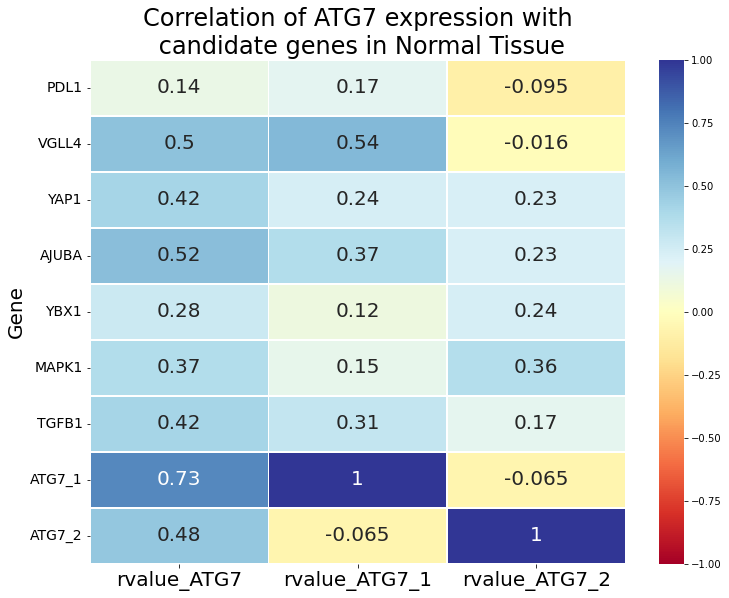

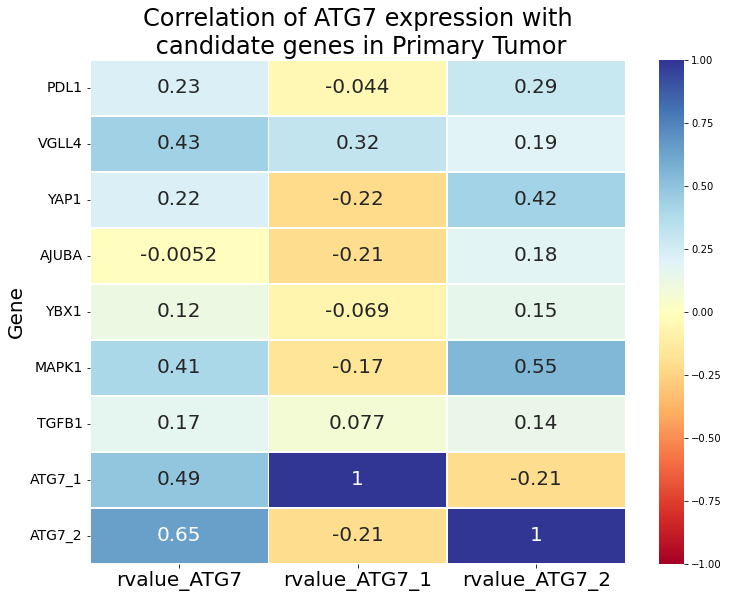

<Figure size 864x576 with 0 Axes>

In [10]:
# Spearman Correlation, main genes 
all_tissue_used = [[ensembl_normal_atg7_proteinGE,'Normal Tissue'], 
                   [ensembl_primary_atg7_proteinGE,'Primary Tumor']]

PDL1 = 'ENSG00000120217'
VGLL4 = 'ENSG00000144560'
HK2 = 'ENSG00000159399'
PFKP = 'ENSG00000067057'
YAP1 = 'ENSG00000137693'
AJUBA = 'ENSG00000129474'
YBX1 = 'ENSG00000065978'
TGFB1 = 'ENSG00000105329'
ATG7_1 = 'ATG7_1'
ATG7_2 = 'ATG7_2'
MTDH = 'ENSG00000147649'
MAPK1 = 'ENSG00000100030'
KPNA1 = 'ENSG00000114030'
TNPO1 = 'ENSG00000083312'

for tissue in all_tissue_used:
    gene_list_t = []
    rvalue_list_t = []
    pvalue_list_t = []

    gene_list_1 = []
    rvalue_list_1 = []
    pvalue_list_1 = []

    gene_list_2 = []
    rvalue_list_2 = []
    pvalue_list_2 = []

    genes_x = [[PDL1, 'PDL1'], [VGLL4,'VGLL4'], [YAP1, 'YAP1'], 
               [AJUBA,'AJUBA'], [YBX1,'YBX1'], [MAPK1, 'MAPK1'],
               [TGFB1,'TGFB1'], [ATG7_1,'ATG7_1'], [ATG7_2,'ATG7_2']]

    for gene in genes_x:
        x = tissue[0][gene[0]].to_list()
        yt = tissue[0]['ATG7'].to_list()
        y1 = tissue[0]['ATG7_1'].to_list()
        y2 = tissue[0]['ATG7_2'].to_list()  
        
        #stats, spearman correlation
        ##ATG7(total)
        r_value, p_value = scipy.stats.spearmanr(x, yt)
        gene_list_t.append(gene[1])
        rvalue_list_t.append(r_value)
        pvalue_list_t.append(p_value)
        ##ATG7(1)
        r_value, p_value = scipy.stats.spearmanr(x, y1)
        gene_list_1.append(gene[1])
        rvalue_list_1.append(r_value)
        pvalue_list_1.append(p_value)
        ##ATG7(2)
        r_value, p_value = scipy.stats.spearmanr(x, y2)
        gene_list_2.append(gene[1])
        rvalue_list_2.append(r_value)
        pvalue_list_2.append(p_value)
        
    #create a dictionnary
    d = dict(Gene = gene_list_t, rvalue_ATG7 = rvalue_list_t,
                                 rvalue_ATG7_1 = rvalue_list_1, 
                                 rvalue_ATG7_2 = rvalue_list_2)
    #convert to DF
    candidate_corr = pandas.DataFrame.from_dict(d, orient='index')
    candidate_corr = candidate_corr.T
    candidate_corr.set_index('Gene', drop=True, inplace=True)
    candidate_corr = candidate_corr.assign(rvalue_ATG7 = candidate_corr['rvalue_ATG7'].astype(float),
                                           rvalue_ATG7_1 = candidate_corr['rvalue_ATG7_1'].astype(float), 
                                           rvalue_ATG7_2 = candidate_corr['rvalue_ATG7_2'].astype(float))
    
    #graph, heatmap
    heatmap = seaborn.heatmap(candidate_corr, annot=True, cmap="RdYlBu", vmin=-1, vmax=1, linewidths=.5)
    plt.title('Correlation of ATG7 expression with\n candidate genes in '+ tissue[1])
    plt.yticks(rotation=0, fontsize=14)
    plt.subplots_adjust(top=1)
    plt.show()
    plt.clf()

Normal Tissue : (5847, 19384)
 29 are removed from head and tail
 without extremities: (5789, 19384)

Normal Tissue
  correlation between ATG7_1 and ATG7_1 is: r_value = 1.00 for a p_value of 0.00e+00
  correlation between ATG7_2 and ATG7_1 is: r_value = -0.06 for a p_value of 2.45e-06


findfont: Font family ['FreeSans'] not found. Falling back to DejaVu Sans.


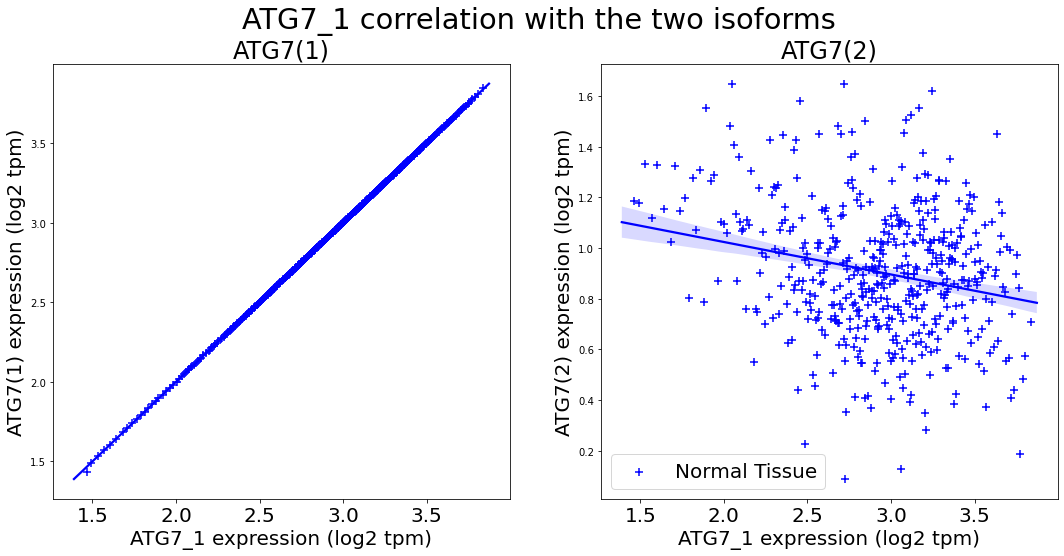

Primary Tumors : (8022, 19384)
 40 are removed from head and tail
 without extremities: (7942, 19384)

Primary Tumors
  correlation between ATG7_1 and ATG7_1 is: r_value = 1.00 for a p_value of 0.00e+00
  correlation between ATG7_2 and ATG7_1 is: r_value = -0.22 for a p_value of 4.83e-84


<Figure size 864x576 with 0 Axes>

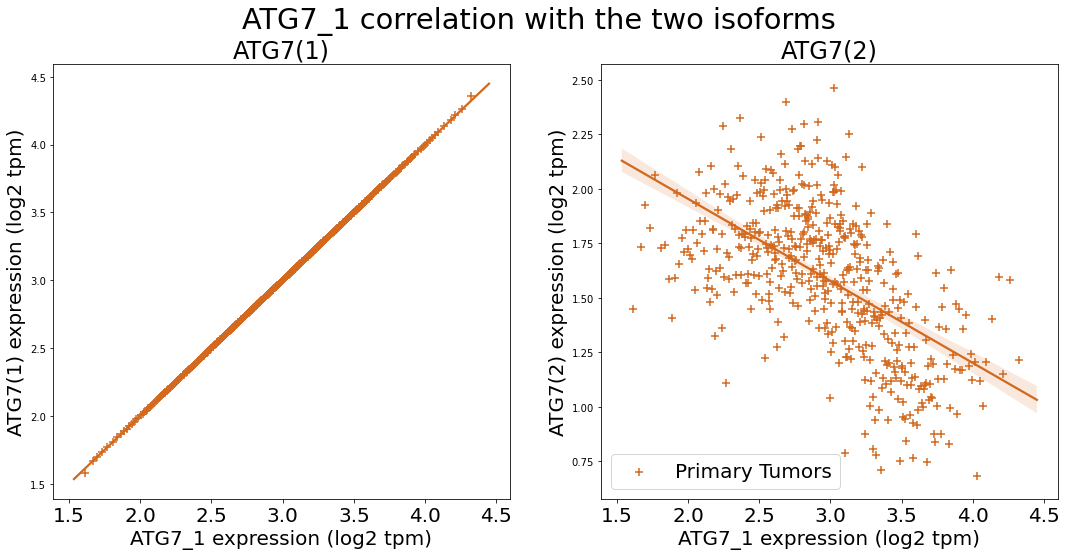


Normal Tissue : (5847, 19384)
 29 are removed from head and tail
 without extremities: (5789, 19384)

Normal Tissue
  correlation between ATG7_1 and MAPK1 is: r_value = 0.14 for a p_value of 1.09e-26
  correlation between ATG7_2 and MAPK1 is: r_value = 0.36 for a p_value of 9.23e-176


<Figure size 864x576 with 0 Axes>

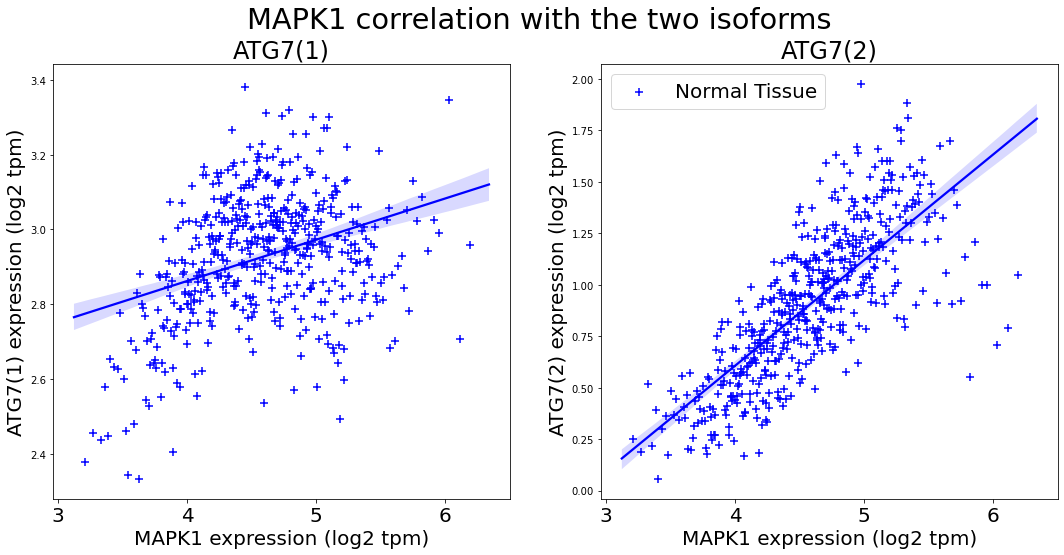

Primary Tumors : (8022, 19384)
 40 are removed from head and tail
 without extremities: (7942, 19384)

Primary Tumors
  correlation between ATG7_1 and MAPK1 is: r_value = -0.17 for a p_value of 2.82e-54
  correlation between ATG7_2 and MAPK1 is: r_value = 0.55 for a p_value of 0.00e+00


<Figure size 864x576 with 0 Axes>

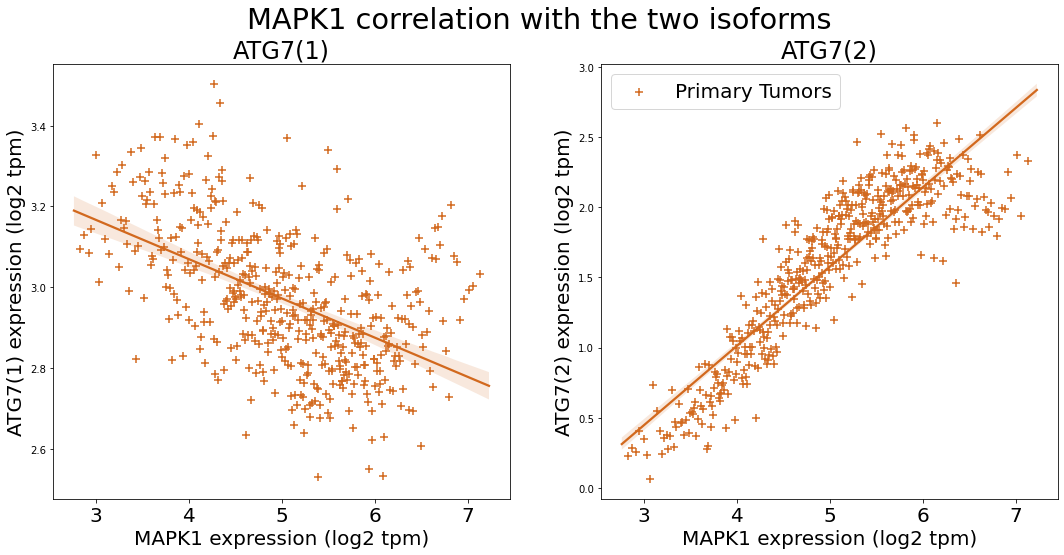


Normal Tissue : (5847, 19384)
 29 are removed from head and tail
 without extremities: (5789, 19384)

Normal Tissue
  correlation between ATG7_1 and MTDH is: r_value = 0.12 for a p_value of 1.65e-20
  correlation between ATG7_2 and MTDH is: r_value = 0.31 for a p_value of 1.08e-128


<Figure size 864x576 with 0 Axes>

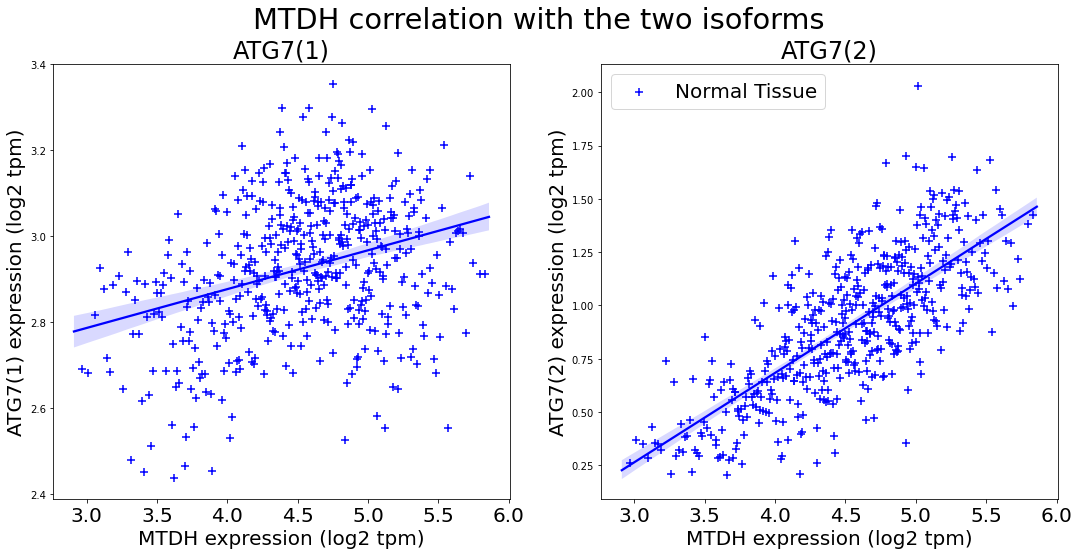

Primary Tumors : (8022, 19384)
 40 are removed from head and tail
 without extremities: (7942, 19384)

Primary Tumors
  correlation between ATG7_1 and MTDH is: r_value = -0.32 for a p_value of 2.69e-187
  correlation between ATG7_2 and MTDH is: r_value = 0.58 for a p_value of 0.00e+00


<Figure size 864x576 with 0 Axes>

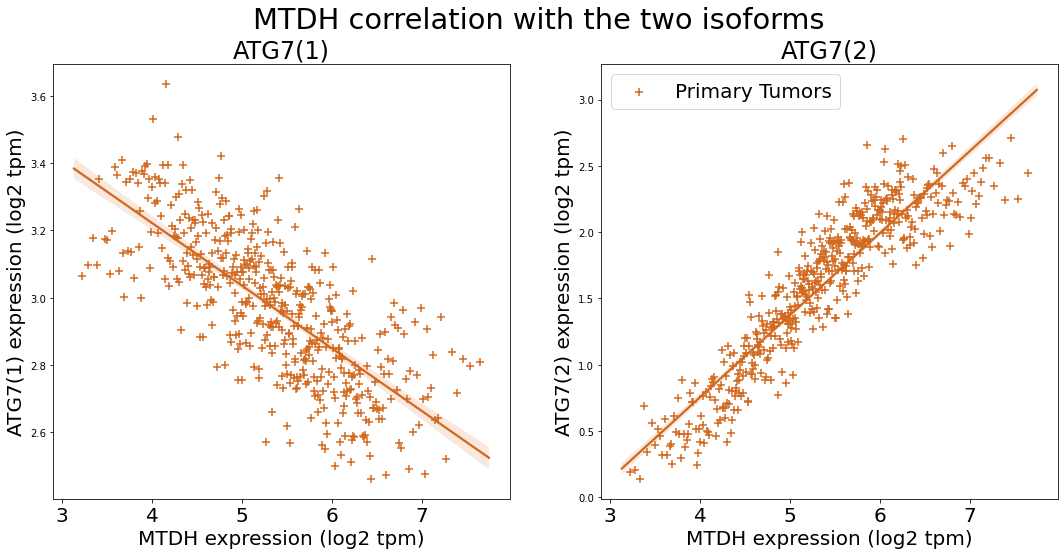


Normal Tissue : (5847, 19384)
 29 are removed from head and tail
 without extremities: (5789, 19384)

Normal Tissue
  correlation between ATG7_1 and PDL1 is: r_value = 0.18 for a p_value of 1.72e-42
  correlation between ATG7_2 and PDL1 is: r_value = -0.09 for a p_value of 3.58e-12


<Figure size 864x576 with 0 Axes>

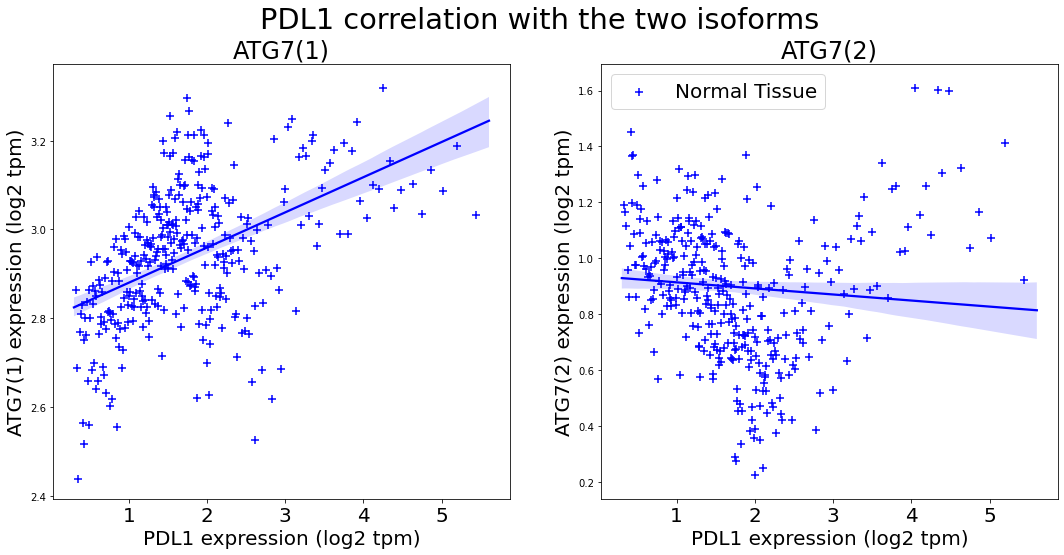

Primary Tumors : (8022, 19384)
 40 are removed from head and tail
 without extremities: (7942, 19384)

Primary Tumors
  correlation between ATG7_1 and PDL1 is: r_value = -0.04 for a p_value of 8.35e-05
  correlation between ATG7_2 and PDL1 is: r_value = 0.28 for a p_value of 1.15e-146


<Figure size 864x576 with 0 Axes>

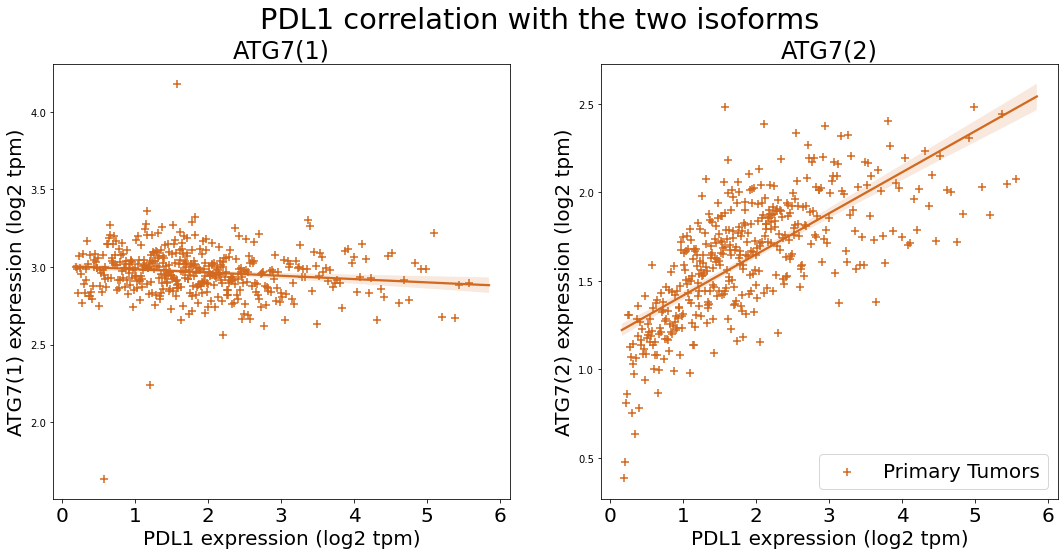


Normal Tissue : (5847, 19384)
 29 are removed from head and tail
 without extremities: (5789, 19384)

Normal Tissue
  correlation between ATG7_1 and MTDH is: r_value = 0.12 for a p_value of 1.65e-20
  correlation between ATG7_2 and MTDH is: r_value = 0.31 for a p_value of 1.08e-128


<Figure size 864x576 with 0 Axes>

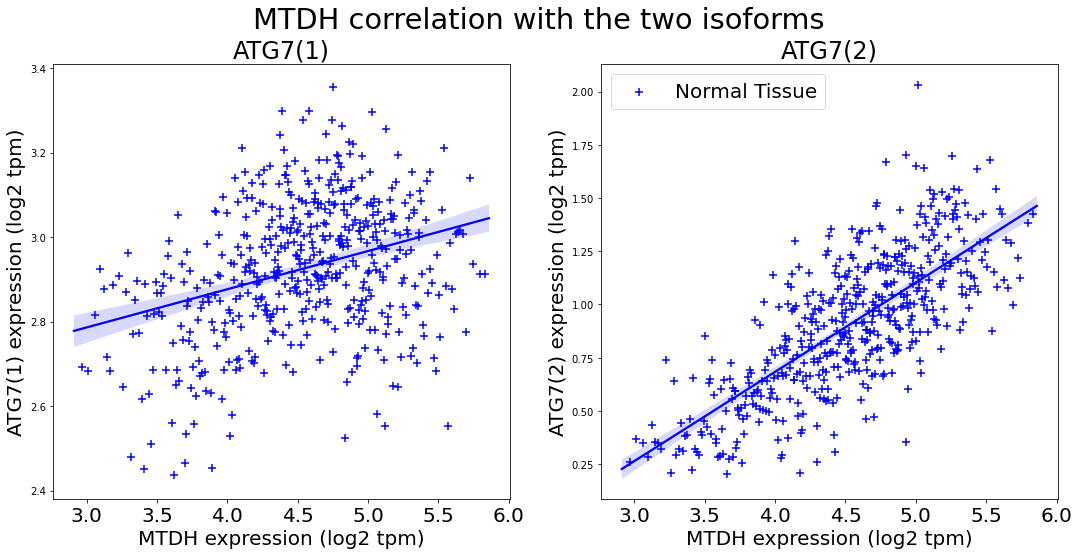

Primary Tumors : (8022, 19384)
 40 are removed from head and tail
 without extremities: (7942, 19384)

Primary Tumors
  correlation between ATG7_1 and MTDH is: r_value = -0.32 for a p_value of 2.69e-187
  correlation between ATG7_2 and MTDH is: r_value = 0.58 for a p_value of 0.00e+00


<Figure size 864x576 with 0 Axes>

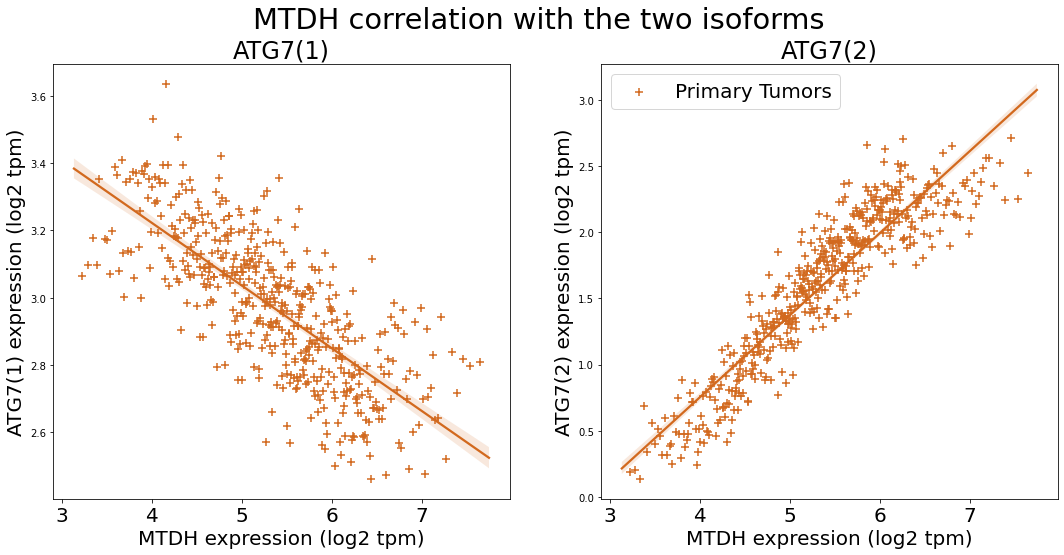


Normal Tissue : (5847, 19384)
 29 are removed from head and tail
 without extremities: (5789, 19384)

Normal Tissue
  correlation between ATG7_1 and HK2 is: r_value = 0.03 for a p_value of 1.23e-02
  correlation between ATG7_2 and HK2 is: r_value = 0.40 for a p_value of 9.38e-226


<Figure size 864x576 with 0 Axes>

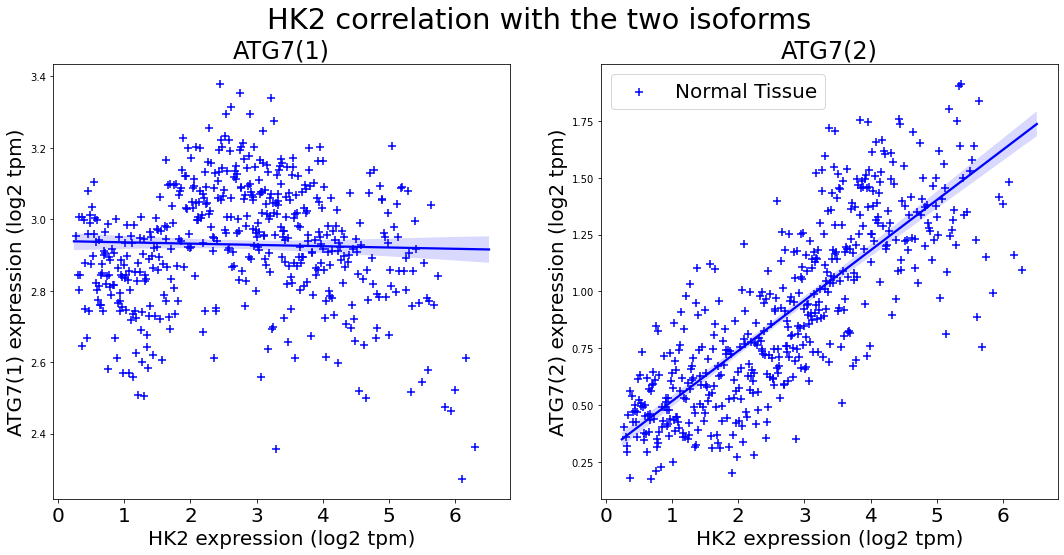

Primary Tumors : (8022, 19384)
 40 are removed from head and tail
 without extremities: (7942, 19384)

Primary Tumors
  correlation between ATG7_1 and HK2 is: r_value = -0.18 for a p_value of 8.05e-59
  correlation between ATG7_2 and HK2 is: r_value = 0.36 for a p_value of 1.99e-241


<Figure size 864x576 with 0 Axes>

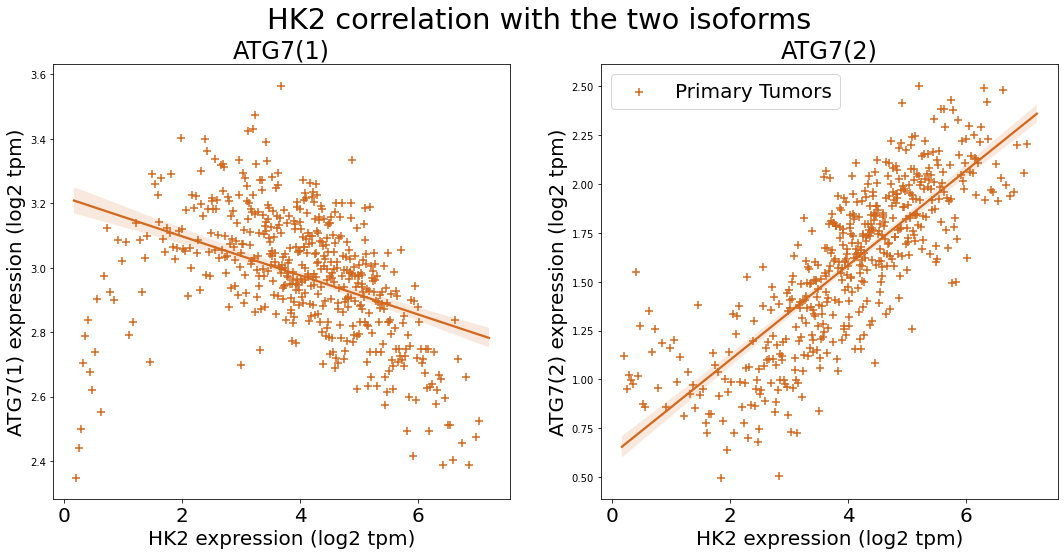


Normal Tissue : (5847, 19384)
 29 are removed from head and tail
 without extremities: (5789, 19384)

Normal Tissue
  correlation between ATG7_1 and PFKP is: r_value = 0.06 for a p_value of 1.14e-05
  correlation between ATG7_2 and PFKP is: r_value = -0.07 for a p_value of 8.70e-08


<Figure size 864x576 with 0 Axes>

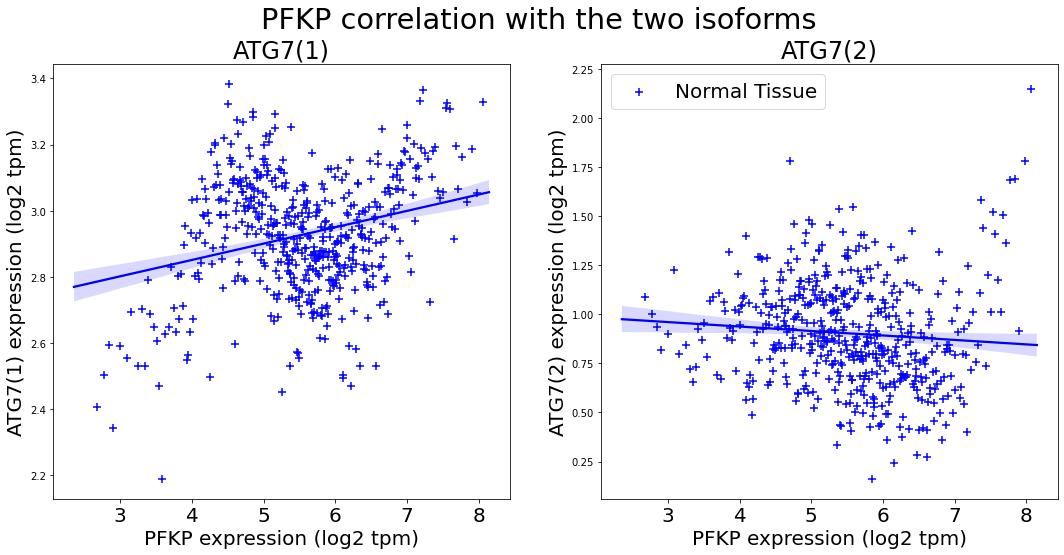

Primary Tumors : (8022, 19384)
 40 are removed from head and tail
 without extremities: (7942, 19384)

Primary Tumors
  correlation between ATG7_1 and PFKP is: r_value = -0.02 for a p_value of 6.68e-02
  correlation between ATG7_2 and PFKP is: r_value = 0.03 for a p_value of 4.38e-03


<Figure size 864x576 with 0 Axes>

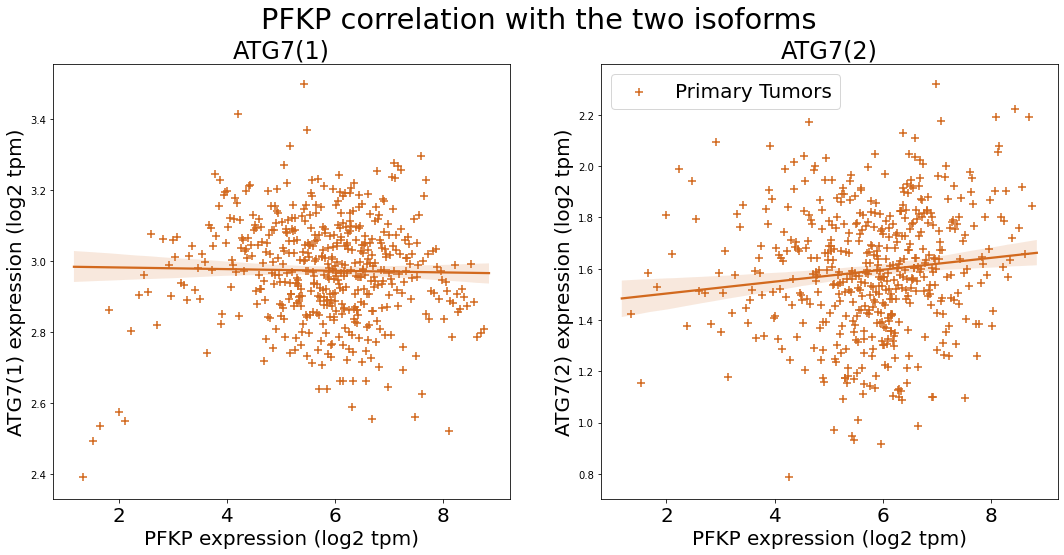


Normal Tissue : (5847, 19384)
 29 are removed from head and tail
 without extremities: (5789, 19384)

Normal Tissue
  correlation between ATG7_1 and YAP1 is: r_value = 0.23 for a p_value of 4.38e-73
  correlation between ATG7_2 and YAP1 is: r_value = 0.23 for a p_value of 1.74e-67


<Figure size 864x576 with 0 Axes>

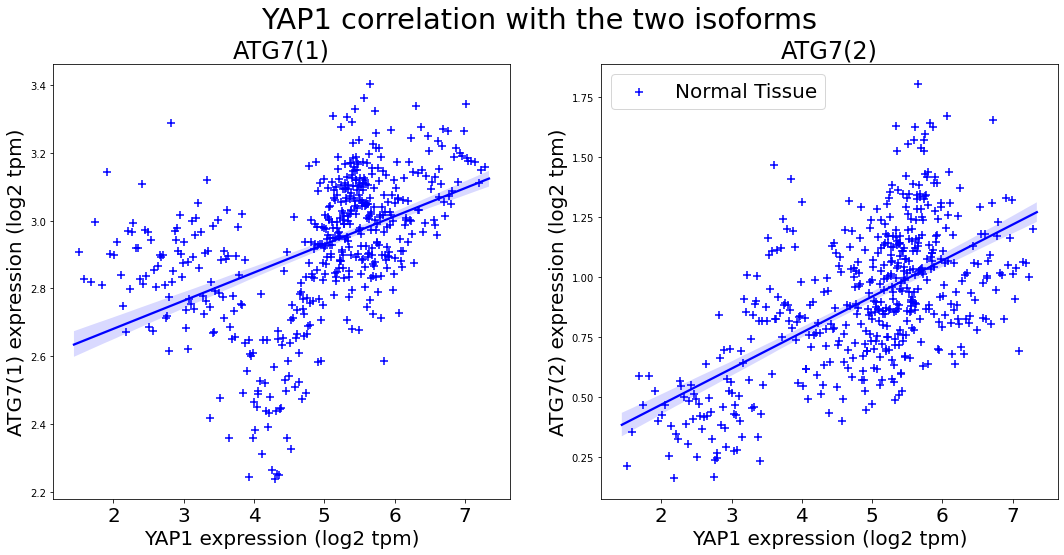

Primary Tumors : (8022, 19384)
 40 are removed from head and tail
 without extremities: (7942, 19384)

Primary Tumors
  correlation between ATG7_1 and YAP1 is: r_value = -0.22 for a p_value of 2.10e-86
  correlation between ATG7_2 and YAP1 is: r_value = 0.42 for a p_value of 0.00e+00


<Figure size 864x576 with 0 Axes>

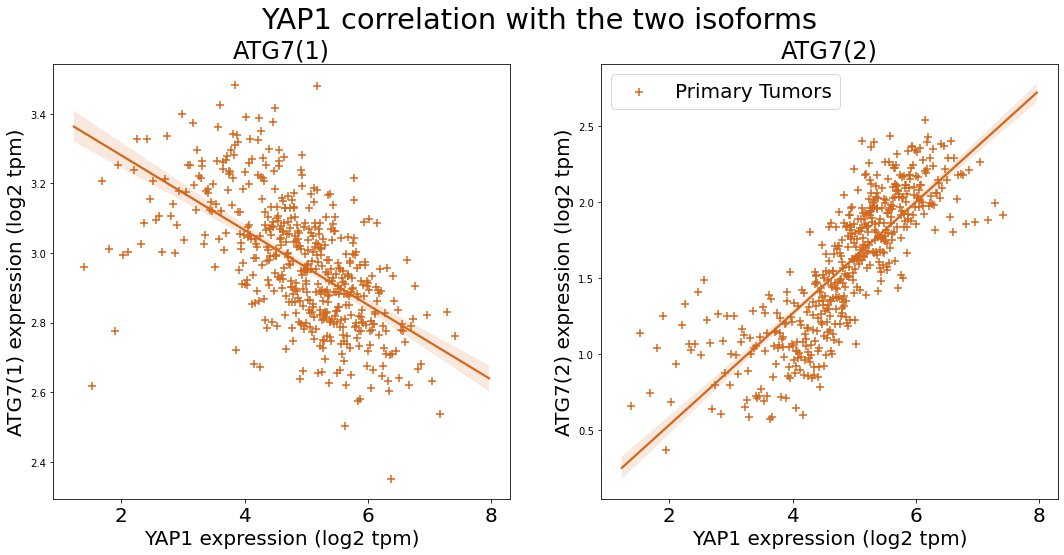


Normal Tissue : (5847, 19384)
 29 are removed from head and tail
 without extremities: (5789, 19384)

Normal Tissue
  correlation between ATG7_1 and AJUBA is: r_value = 0.37 for a p_value of 2.62e-187
  correlation between ATG7_2 and AJUBA is: r_value = 0.23 for a p_value of 2.56e-69


<Figure size 864x576 with 0 Axes>

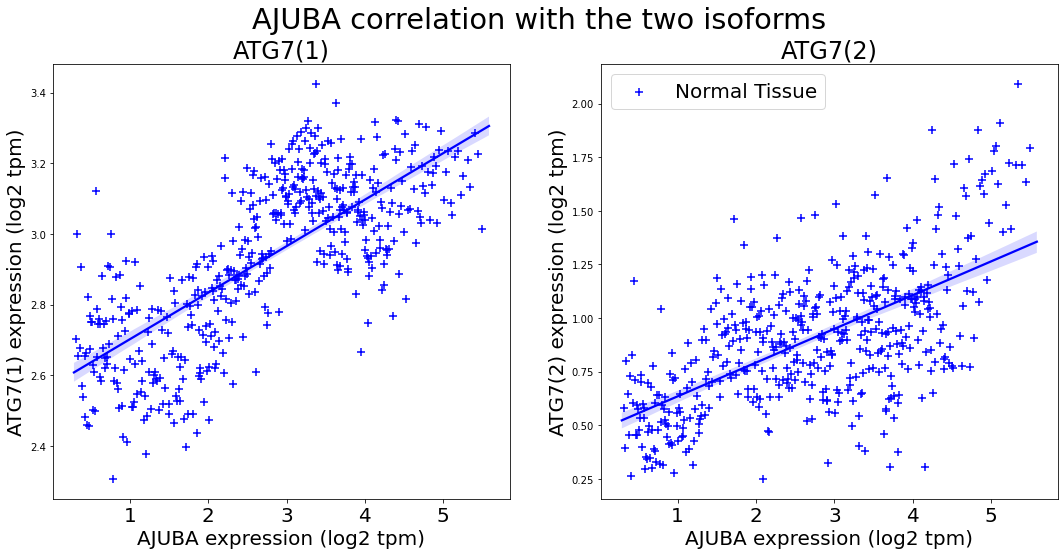

Primary Tumors : (8022, 19384)
 40 are removed from head and tail
 without extremities: (7942, 19384)

Primary Tumors
  correlation between ATG7_1 and AJUBA is: r_value = -0.21 for a p_value of 1.94e-76
  correlation between ATG7_2 and AJUBA is: r_value = 0.18 for a p_value of 8.55e-57


<Figure size 864x576 with 0 Axes>

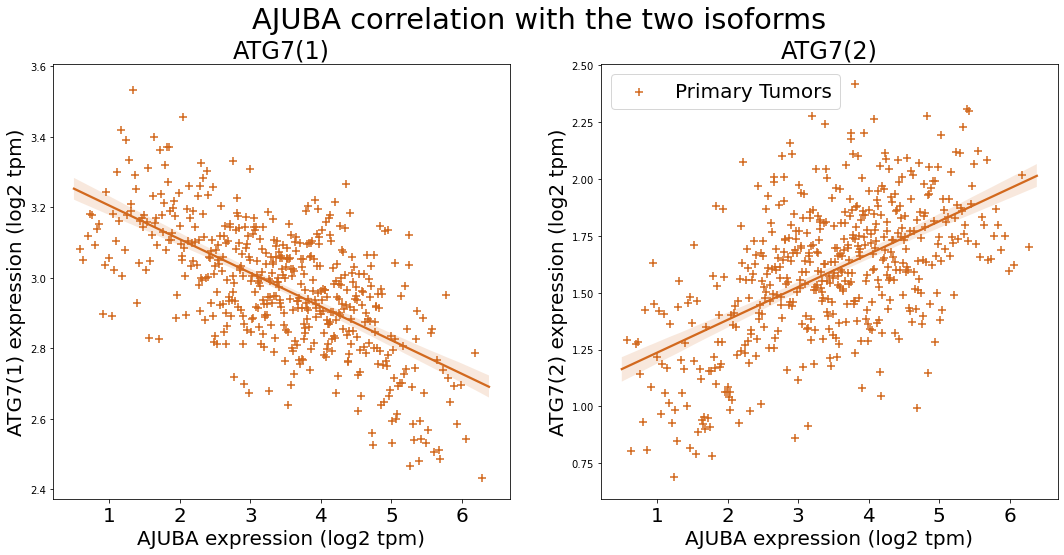


Normal Tissue : (5847, 19384)
 29 are removed from head and tail
 without extremities: (5789, 19384)

Normal Tissue
  correlation between ATG7_1 and YBX1 is: r_value = 0.11 for a p_value of 6.94e-18
  correlation between ATG7_2 and YBX1 is: r_value = 0.23 for a p_value of 5.68e-70


<Figure size 864x576 with 0 Axes>

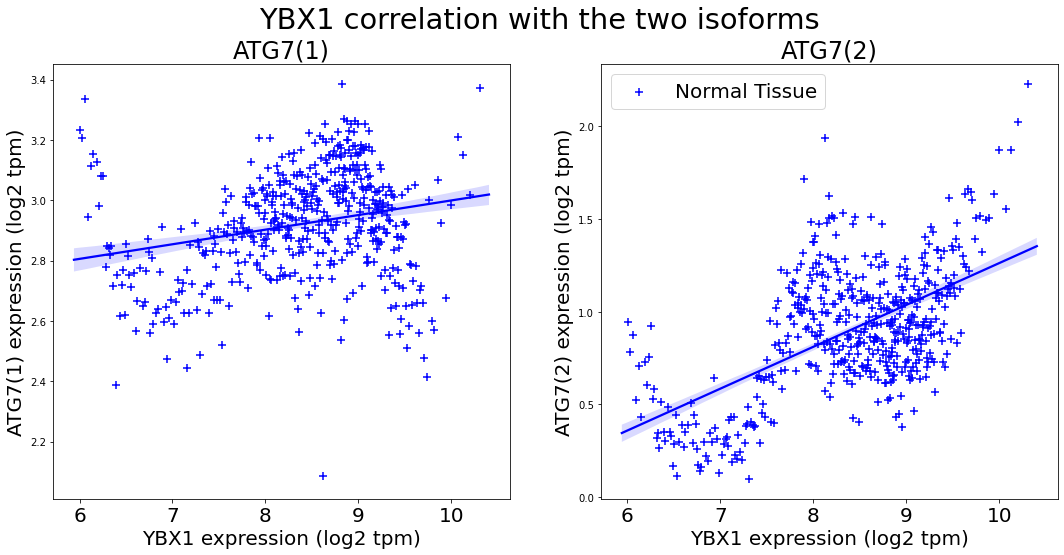

Primary Tumors : (8022, 19384)
 40 are removed from head and tail
 without extremities: (7942, 19384)

Primary Tumors
  correlation between ATG7_1 and YBX1 is: r_value = -0.07 for a p_value of 6.47e-10
  correlation between ATG7_2 and YBX1 is: r_value = 0.15 for a p_value of 1.00e-41


<Figure size 864x576 with 0 Axes>

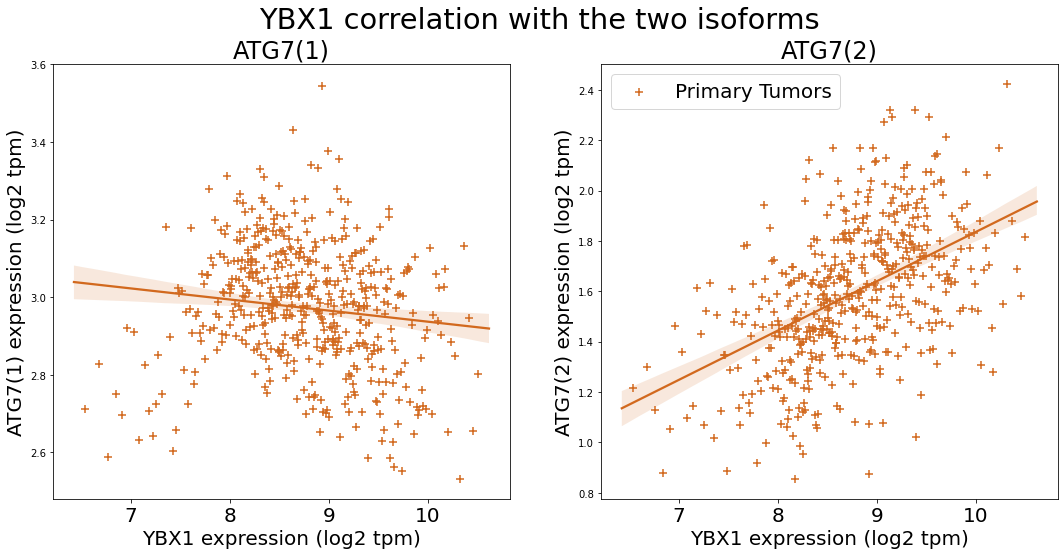


Normal Tissue : (5847, 19384)
 29 are removed from head and tail
 without extremities: (5789, 19384)

Normal Tissue
  correlation between ATG7_1 and TGFB1 is: r_value = 0.30 for a p_value of 5.84e-122
  correlation between ATG7_2 and TGFB1 is: r_value = 0.17 for a p_value of 7.12e-39


<Figure size 864x576 with 0 Axes>

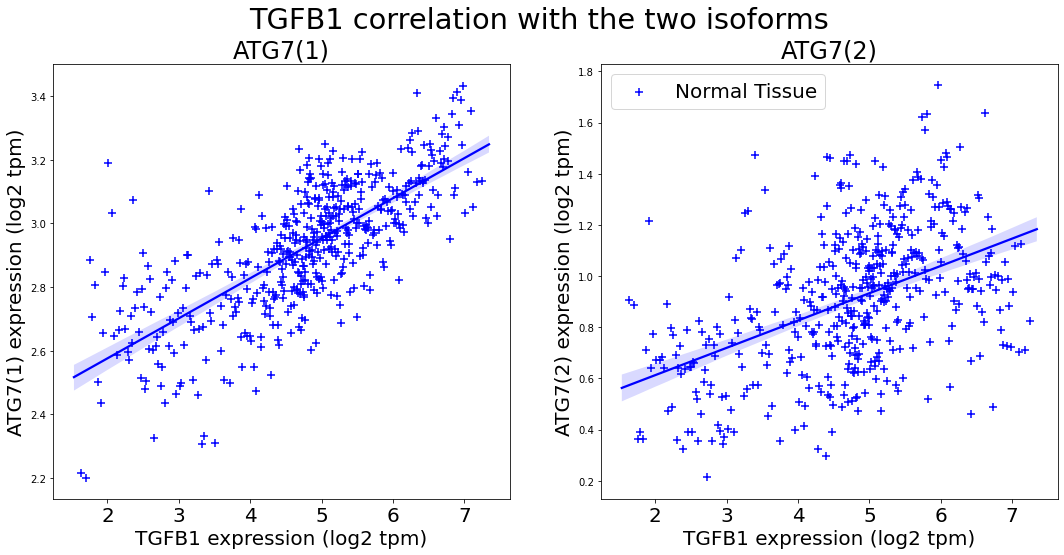

Primary Tumors : (8022, 19384)
 40 are removed from head and tail
 without extremities: (7942, 19384)

Primary Tumors
  correlation between ATG7_1 and TGFB1 is: r_value = 0.07 for a p_value of 7.06e-10
  correlation between ATG7_2 and TGFB1 is: r_value = 0.14 for a p_value of 1.11e-35


<Figure size 864x576 with 0 Axes>

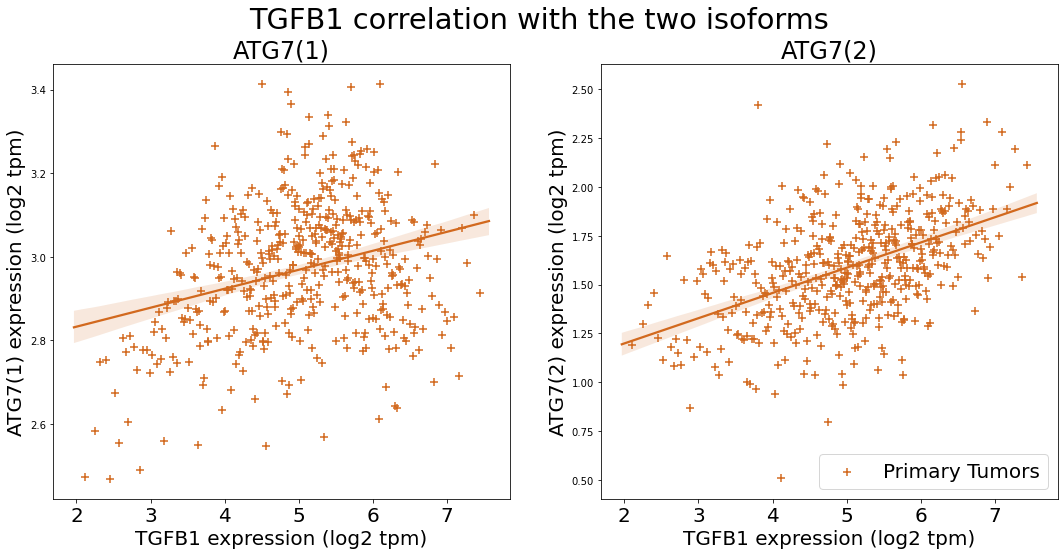

<Figure size 864x576 with 0 Axes>

In [12]:
#Graphic representation, two graphs in one, remove the extremities to have better graph 
all_tissue_used = [[ensembl_normal_atg7_proteinGE,'Normal Tissue', 'blue'], 
                   [ensembl_primary_atg7_proteinGE,'Primary Tumors', 'chocolate']]

genes = [[ATG7_1,'ATG7_1'], [MAPK1,'MAPK1'], [MTDH,'MTDH'], 
         [PDL1, 'PDL1'], [HK2, "HK2"], [PFKP,'PFKP'], 
         [YAP1,'YAP1'], [AJUBA,'AJUBA'], [YBX1,'YBX1'], [TGFB1,'TGFB1']]

for gene in genes:
    for df in all_tissue_used:
        #sort by value, remove the extremities
        print(df[1], ':', df[0].shape)
        for_genes = df[0].sort_values([gene[0]], ascending = False) 
        lenght = len(for_genes)
        without_05perc = int(lenght*0.005)
        print('', without_05perc, 'are removed from head and tail')
        without_head = without_05perc
        without_tail = lenght - without_05perc
                
        df_no_extrem = for_genes.iloc[without_head:without_tail,:]
        print(' without extremities:', df_no_extrem.shape)
        print()
        
        
        x = df_no_extrem[gene[0]].to_list()
        y1 = df_no_extrem['ATG7_1'].to_list()
        y2 = df_no_extrem['ATG7_2'].to_list()
        
        #Statistic
        print(df[1])
        r_value, p_value = scipy.stats.spearmanr(x, y1)
        print('  correlation between ATG7_1 and', gene[1],  'is:', 'r_value = {:.2f} for a p_value of {:.2e}'.format(r_value, p_value))
        r_value, p_value = scipy.stats.spearmanr(x, y2)
        print('  correlation between ATG7_2 and', gene[1],  'is:', 'r_value = {:.2f} for a p_value of {:.2e}'.format(r_value, p_value))
        
        #graph
        fig, ax = plt.subplots(1,2, figsize=(18,8))
        name = gene[1]+ " correlation with the two isoforms"
        name2 = gene[1]+ " expression (log2 tpm)"

        fig.suptitle(name, fontsize="x-large")
 
        #ATG7(1) graph
        fig = seaborn.regplot(x=x,y=y1, ax=ax[0], x_bins=500, x_ci = 0, marker="+", label = df[1], color = df[2])
        fig.set_title("ATG7(1)")
        fig.set_xlabel(name2)
        fig.set_ylabel('ATG7(1) expression (log2 tpm)')
        
        #ATG7(2) graph
        fig = seaborn.regplot(x=x,y=y2, ax=ax[1], x_bins=500, x_ci = 0, marker="+", label = df[1], color = df[2])
        fig.set_title("ATG7(2)")
        fig.set_xlabel(name2)
        fig.set_ylabel('ATG7(2) expression (log2 tpm)')
        
        plt.legend()
        plt.show()
        plt.clf()
    print()